1. Multiclass perceptron. In this problem you will code and run a multiclass perceptron classifier on a “Dry Beans” dataset. More information on the dataset can be found here. For this problem, be sure to use the provided train and test datasets so that everyone is using the same dataset split; do not start from the UCI website and divide it yourself into train and test sets.
For this homework problem, code a multiclass perceptron learning and prediction algorithm, for D dimensions and C classes. Use the true multiclass perceptron algorithm given in lecture. (Do not use OvR or OvO for this problem.)

In [3]:
# Importing the required libraries:
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import sys
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import copy
from scipy.special import comb

In [4]:
def open_dataset(file):
    data = []
    with open(file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter = ',')
        
        for row in csv_reader:
            if row == 0:
                continue
            data.append(row)

    data = np.array(data)
    return data

In [5]:
def classifier(weight, X):
    dot_prod = np.dot(weight, X.T)
    return np.argmax(dot_prod, axis = 0)

In [6]:
def discriminant(X, weight_k, weight_l):
    J = 0
    
    for i in range(X.shape[0]):
        J += np.dot(weight_k, X[i].T) - np.dot(weight_l, X[i].T)
            
    return -J

In [7]:
def accuracy(y, y_pred):
    misclassification = 0
    
    for ele in range(y.shape[0]):
        if y[ele] == y_pred[ele]:
            misclassification += 1
            
    return 100 * misclassification / y.shape[0]

In [8]:
def training(X, y):
    weight = np.ones([7, X.shape[1]])
    weight_list = []
    iterations = 0
    J_values = []
    
    for i in range(100):
        X, y = shuffle(X, y)
        
        for j in range(X.shape[0]):
            xi = X[j]
            true_label = y[j]
            score = np.dot(weight, xi.T)
            predicted_label = np.argmax(score)
            
            if true_label != predicted_label:
                weight[int(true_label)] += 1 * xi
                weight[predicted_label] -= 1 * xi
            
            if iterations > 1224799: # Halting condition.
                J_score = discriminant(X, weight[int(true_label)], weight[predicted_label])
                J_values.append(J_score)
                weight_list.append(weight)

            iterations += 1
    
    return J_values, weight_list

1(a) Run your Multiclass Perceptron algorithm on the Dry Beans dataset.
Report the following:
- classification accuracy on the training set and test set.
- final (augmented) weight vectors 𝑤𝑘 , 𝑘 = 1,2, ⋯ , 𝐶 and their magnitudes
||𝑤𝑘 ||, 𝑘 = 1,2, ⋯ , 𝐶.
- the confusion matrix1 on the test set.
Note:
[1] A confusion matrix C for a C-class problem is a 𝐶 × 𝐶 matrix with entries
C𝑖𝑗 = {number of data points labeled as class i that are classified by the ML
system as class j}.

In [30]:
data = open_dataset('Dry_Bean_train.csv')
X = data[1:, :-1].astype(float) 
y = data[1:, -1] 
scalar = StandardScaler()
scalar.fit(X)
X  = scalar.transform(X)
mapping = {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6} # One hot encoding the labels.
y = np.array([mapping[label] for label in y])
X = np.vstack([np.ones([1, X.shape[0]]), X.T]).T
J_values, weight_list = training(X, y)
best_J = np.argmin(J_values)
y_pred = classifier(weight_list[best_J], X)
train_accuracy = accuracy(y, y_pred)
print("The accuracy during the training phase= ", train_accuracy, "%")

The accuracy during the training phase=  91.24826516450322 %


In [31]:
data_test = open_dataset('Dry_Bean_test.csv')
X_test = data_test[1:, :-1].astype(float) 
y_test = data_test[1:, -1] 
mapping = {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}
y_test = np.array([mapping[label] for label in y_test])
X_test  = scalar.transform(X_test)
X_test = np.vstack([np.ones([1, X_test.shape[0]]), X_test.T]).T
y_test_pred = classifier(weight_list[best_J], X_test)
test_accuracy = accuracy(y_test, y_test_pred)
print("The accuracy during the testing phase= ", test_accuracy, "%")

The accuracy during the testing phase=  90.01468428781205 %


In [32]:
for iter in range(7):
    print("Class-", iter + 1, "\n Optimal weight vectors: " , weight_list[best_J][iter])

Class- 1 
 Optimal weight vectors:  [ 13.           3.82997179  20.39920417 -28.85345591  24.91774331
 -45.99660467 -20.05412667   6.56599665   1.03918603  -0.69034173
  -5.75180843 -12.61434675  -3.97589083  28.28892856 -59.30512854
 -16.45376051  16.2314061 ]
Class- 2 
 Optimal weight vectors:  [-65.          48.61943428   9.64406742   7.50764713  19.70459549
  -8.84066792   0.32653552  48.8269999   13.67851827  -1.92350471
   2.10968892  21.62721894   9.40810113  41.64326508  24.14672139
   8.44362185   3.28011924]
Class- 3 
 Optimal weight vectors:  [ -1.          -1.48061617 -28.4731089   32.22444935 -10.22107535
 -14.41893238  17.39847243   5.33163248  12.21494695   6.95642966
  -3.0941104    9.36947662 -12.06608857 -44.25294916  16.14389529
 -14.43160768  -6.61311021]
Class- 4 
 Optimal weight vectors:  [ 23.           2.02023994  37.02976629 -11.66777988   5.66323252
 -10.63398119  30.92160254  -3.63973574  -1.15403459  -0.55624011
  -1.66357422   3.31204862  12.15455707  43.98

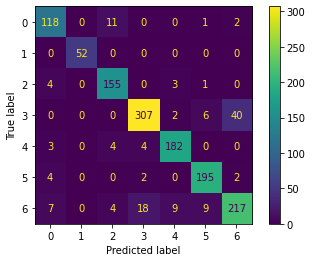

<Figure size 432x288 with 0 Axes>

In [33]:
# Plotting the confusion matirx:
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.figure()
plt.show()

In [34]:
weight_opt = weight_list[best_J]

for i in range(7):
    mag = np.linalg.norm(weight_opt[i])
    print("Class-", i + 1, "\t Magnitude of weight vector: ", mag)

Class- 1 	 Magnitude of weight vector:  98.36308136238614
Class- 2 	 Magnitude of weight vector:  112.8699000064481
Class- 3 	 Magnitude of weight vector:  73.53458892881062
Class- 4 	 Magnitude of weight vector:  74.95193359684684
Class- 5 	 Magnitude of weight vector:  96.77932355101225
Class- 6 	 Magnitude of weight vector:  66.17918583520637
Class- 7 	 Magnitude of weight vector:  101.23018909824114


1(b) Repeat part (a) 10 times. Report only the mean and standard deviation of: classification accuracies, weight vector norms ||𝑤𝑘 ||, k = 1,2, ⋯ , C , and confusion matrix. (For the confusion matrix, give a mean matrix (each entry is the mean of 10 runs), and a standard deviation matrix (each entry is the standard deviation of 10 runs). No need to report individual results from each run.

In [35]:
mean = []
testList_mean = []
weight_map = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0}
weight_map_list = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: []}
confusion_matList = []

for i in range(10):  
    # Training phase:  
    data = open_dataset('Dry_Bean_train.csv')
    X = data[1:, :-1].astype(float) 
    y = data[1:, -1]
    scalar = StandardScaler()
    scalar.fit(X)
    X  = scalar.transform(X)
    mapping = {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}
    y = np.array([mapping[label] for label in y])
    X = np.vstack([np.ones([1, X.shape[0]]), X.T]).T
    J_values, weight_list = training(X, y)
    best_J = np.argmin(J_values)
    y_pred = classifier(weight_list[best_J], X)
    train_accuracy = accuracy(y, y_pred)
    mean.append(train_accuracy)
    
    # Testing phase:
    data_test = open_dataset('Dry_Bean_test.csv')
    X_test = data_test[1:, :-1].astype(float) 
    y_test = data_test[1:, -1]
    mapping = {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}
    y_test = np.array([mapping[label] for label in y_test])
    X_test  = scalar.transform(X_test)
    X_test = np.vstack([np.ones([1, X_test.shape[0]]), X_test.T]).T
    y_test_pred = classifier(weight_list[best_J], X_test)
    test_accuracy = accuracy(y_test, y_test_pred)
    testList_mean.append(test_accuracy)
    
    weight_opt = weight_list[best_J]
    
    for i in range(7):
        
        mag = np.linalg.norm(weight_opt[i])
        weight_map[i] += mag
        weight_map_list[i].append(mag)
    
    confusion_matList.append(confusion_matrix(y_test, y_test_pred))
    
print("Mean of the training phase- ", np.mean(mean))
print("Standard deviation of the training phase- ", np.std(mean))
print("Mean of the testing phase- ", np.mean(testList_mean))
print("Standard deviation of the testing phase- ", np.std(testList_mean))

for i in range(7):
    print("\n Class-", i + 1, "\t Weight Magnitude Mean: ", weight_map[i]/10)


for i in range(7):
    print("\n Class-", i + 1, "\t Weight Magnitude Standard Deviation: ", np.std(weight_map_list[i]))

print("\n Confusion matrix of the  mean values:")
print(np.mean(confusion_matList, axis = 0))
print("\n Confusion matrix of the standard deviation values:")
print(np.std(confusion_matList, axis = 0))

Mean of the training phase-  89.33137398971346
Standard deviation of the training phase-  1.4393490944341938
Mean of the testing phase-  88.77386196769456
Standard deviation of the testing phase-  1.2470626561312343

 Class- 1 	 Weight Magnitude Mean:  96.71786036845268

 Class- 2 	 Weight Magnitude Mean:  110.39038103118301

 Class- 3 	 Weight Magnitude Mean:  73.42615007264047

 Class- 4 	 Weight Magnitude Mean:  74.70602324461706

 Class- 5 	 Weight Magnitude Mean:  95.30493218139756

 Class- 6 	 Weight Magnitude Mean:  68.18542931821702

 Class- 7 	 Weight Magnitude Mean:  99.38867536201273

 Class- 1 	 Weight Magnitude Standard Deviation:  1.6185751317327848

 Class- 2 	 Weight Magnitude Standard Deviation:  2.991907946062914

 Class- 3 	 Weight Magnitude Standard Deviation:  1.6526497870492876

 Class- 4 	 Weight Magnitude Standard Deviation:  1.2173444880292217

 Class- 5 	 Weight Magnitude Standard Deviation:  2.2671033395645943

 Class- 6 	 Weight Magnitude Standard Deviation:

2. Code up a one vs. rest (OvR) classifier, for a C-class problem with D features, that can call 2-class fit and predict methods for each 2-class classifier. Use a 2-class perceptron to train each 2-class problem. Use the same parameters given in Problem 1 “Algorithm notes” above. For each 2-class problem, store the optimal weight vector ŵ k and the class assignment for each data point (e.g., +1 for Sk′ or -1 for S𝑘̅̅′̅̅).

In [9]:
def discriminant(weight_test, g_label):
    dataset_length = g_label.shape[0]
    J_values = 0
    
    for i in range(dataset_length):
        
        if np.dot(weight_test, g_label[i, :].T) <= 0:
            J_values -= np.dot(weight_test, g_label[i, :].T)
    
    return J_values

In [10]:
## this function is from Prof. Chugg's PlotNonLinear.py script
## https://github.com/keithchugg/ee559_spring2023/blob/main/hw_helpers/PlotNonlinear.py

def plot_multiclass_histograms(X_aug, W, y, norm_W = False, scale = 1, class_names = None):
    if norm_W:
        W = W / np.linalg.norm(W, axis = 0)
    y_soft = X_aug @ W
    N, C = y_soft.shape
    y_hard = np.argmax(y_soft, axis=1)
    error_percent = 100 * np.sum(y != y_hard) / len(y) 

    fig, ax = plt.subplots(C, sharex=True, figsize=(12 * scale, 4 * C * scale))
    y_soft_cs = []
    conditional_error_rate = np.zeros(C)
    if class_names is None:
        class_names = [f'Class {i}' for i in range(C)]
    for c_true in range(C):
        y_soft_cs.append(X_aug[y == c_true] @ W)
        y_hard_c = np.argmax(y_soft_cs[c_true], axis=1)
        conditional_error_rate[c_true] = 100 * np.sum(y_hard_c != c_true) / len(y_hard_c)
    for c_true in range(C):
        peak = -100
        for c in range(C):
            hc = ax[c_true].hist(y_soft_cs[c_true].T[c], bins = 100, alpha=0.4, label=class_names[c])
            peak = np.maximum(np.max(hc[0]), peak)
            ax[c_true].legend()
            ax[c_true].grid(':')
        ax[c_true].text(0, 0.9 * peak, f'True: {class_names[c_true]}\nConditional Error Rate = {conditional_error_rate[c_true] : 0.2f}%')
    if norm_W:
        ax[C-1].set_xlabel(r'nromalized discriminant function $g_m(x) / || {\bf w} ||$')
    else:
        ax[C-1].set_xlabel(r'discriminant function $g_m(x)$')

In [11]:
def training(X, y, label):
    weight = np.ones([1, X.shape[1]])
    optimal_weight = np.ones([1, X.shape[1]])
    iterations = 0
    best_J = sys.maxsize
    reflected_data = copy.deepcopy(X)

    for j in range(X.shape[0]):
        
        if y[j] != label:
            reflected_data[j] *= -1
    
    for epoch in range(100):
        combined = np.c_[reflected_data, y]
        combined = shuffle(combined)
        reflected_data = combined[:, :17]
        y = combined[:, -1]
        
        for i in range(X.shape[0]):
            z_n = np.dot(weight, reflected_data[i].T)
            
            if z_n <= 0:
                weight += 1 * reflected_data[i]
                
            if iterations > 1224799:
                J = discriminant(weight, reflected_data)
                
                if J < best_J:
                    best_J = J
                    optimal_weight = weight
                    
            iterations += 1
            
    return weight, best_J, optimal_weight

2(a) Run the 2-class problems. Store the resulting weight vectors 𝑤𝑘 (will be used in (b)-(d) below). For the result of each 2-class problem, report the following:
– A histogram plot (one plot for each 2-class problem). For the problem 𝑆𝑘
′ 𝑣s. 𝑆𝑘̅̅′̅̅, the histogram plot should show the number of test data points oringinally labeled 𝑆𝑘 in one color, and the number of test data points oringinally labeled 𝑆𝑗 , for all 𝑗 ≠ 𝑘 , in a different color. (Translucent colors work best.) Both of these histogram values should be plotted vs. value of 𝑔(𝑥) (using non-reflected x), on the same plot. See Notebook, Notebook2 for examples.
– The classification accuracy for the 2-class problem on the training set and on the test set.
The 2-class results (weight vectors stored above) will be used for all 3 combining methods below.
For combining the results of the C 2-class classifiers, you will use 3 different methods:
(i) After OvR training, use the final default decision rule given in lecture:
𝑥 ∈ Γ𝑘 iff 𝑥 ∈ Γ𝑘′ and 𝑥 ∈ Γ𝑗̅̅′̅̅ ∀𝑗 ≠ 𝑘 and points in indeterminate regions are left unclassified.
(ii) After OvR training, use MVM decision rule 1 as follows, to classify all data points: Assign 𝑥𝑛 to class 𝑆𝑘 iff 𝑘 = argmaxk (𝑔𝑘 (𝑥))
(iii) After OvR training, use MVM decision rule 2 as follows, to classify all data points: Assign 𝑥𝑛 to class 𝑆𝑘 iff 𝑘 = argmaxk (𝑔𝑘(𝑥)||𝑤𝑘||) in which 𝑤𝑘 in the denominator is non-augmented.

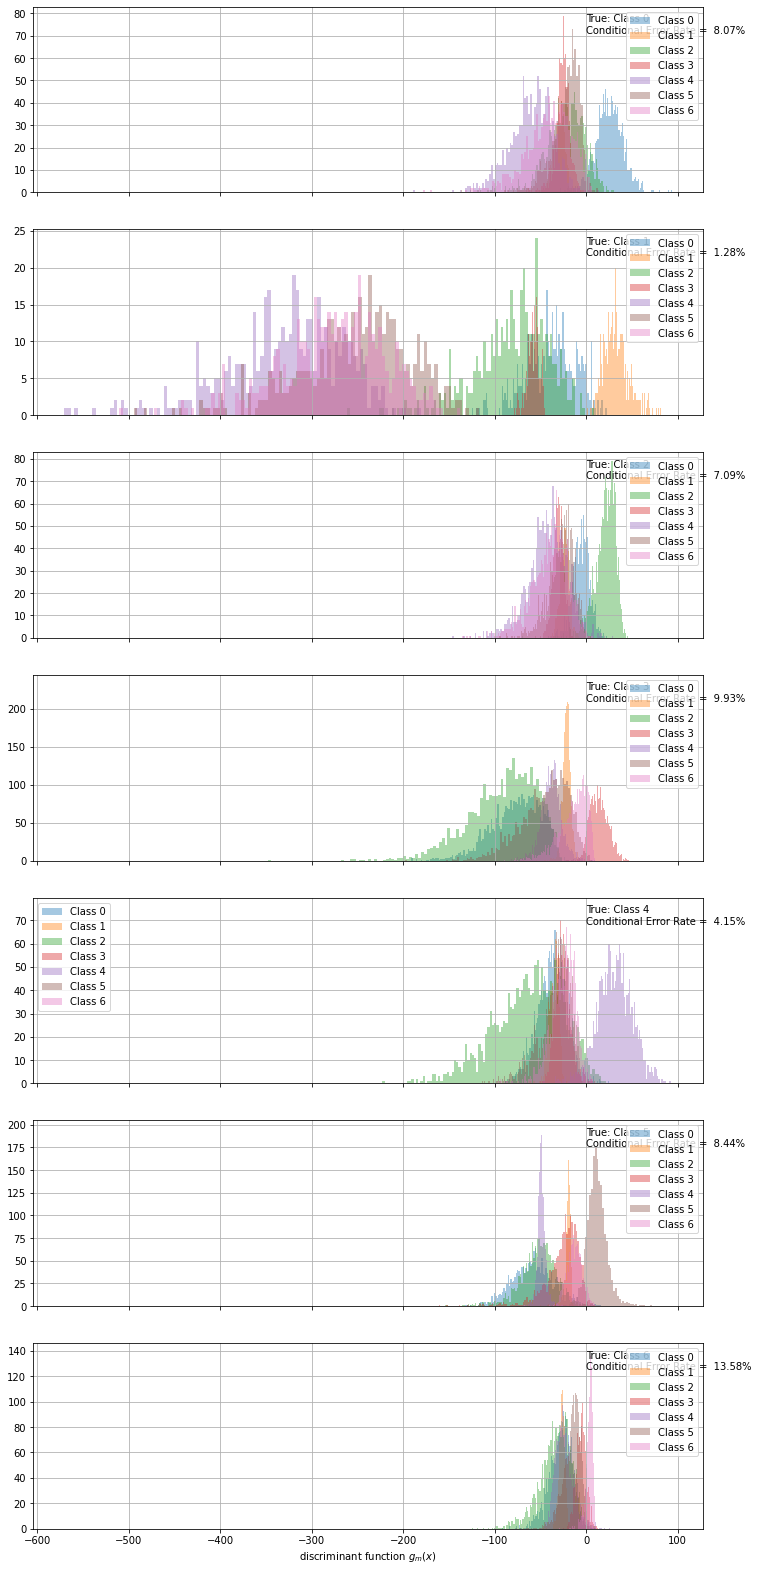

In [12]:
data = open_dataset('Dry_Bean_train.csv')
X = data[1:, :-1].astype(float) 
y = (data[1:, -1])
scalar = StandardScaler()
scalar.fit(X)
X  = scalar.transform(X)
mapping = {'BARBUNYA': 0, 'BOMBAY': 1, 'CALI': 2, 'DERMASON': 3, 'HOROZ': 4, 'SEKER': 5, 'SIRA': 6}
y = np.array([mapping[value] for value in y])
X = np.vstack([np.ones([1, X.shape[0]]), X.T]).T
w_final = np.zeros([7, 17])

for i in range(7):
    w, best_J, optimal_weight = training(X, y, i)
    w_final[i] = optimal_weight
    
plot_multiclass_histograms(X, w_final.T, y)

(b)-(d) Code and run each combining method.
For each method, report the following performance measures separately on the training set and testing set:
– classification accuracy
– error rate
– unclassified rate

**2 (b)**

In [18]:
accuracy_2b = 0
error = 0
unclassified = 0 

for i in range(X.shape[0]):
    score = np.dot(w_final, X[i].T)
    
    for j in range(len(score)):
        
        if score[j] > 0:
            score[j] = 1
        else:
            score[j] = 0
    
    if np.count_nonzero(score) == 1:
        class_label = np.argmax(score)
        
        if y[i] == class_label:
            accuracy_2b += 1
        else:
            error += 1
    
    else:
        unclassified += 1

print("OvR")
print("Classification accuracy: ", 100 * accuracy_2b / X.shape[0], "%")
print("Error rate: ", 100 * error / X.shape[0], "%")
print("Unclassified rate: ", 100 * unclassified / X.shape[0], "%")

OvR
Classification accuracy:  80.14531798514165 %
Error rate:  3.6166217650420442 %
Unclassified rate:  16.23806024981631 %


**2 (c)**

In [21]:
accuracy_2c = 0
error_2c = 0

for i in range(X.shape[0]):
    score = np.dot(w_final, X[i].T)
    class_label = np.argmax(score)
    
    if y[i] == class_label:
        accuracy_2c += 1
    else:
        error_2c += 1

print("MVM decision rule-1")
print("Classification accuracy: ", 100 * accuracy_2c / X.shape[0], "%")
print("Error rate: ", 100 * error_2c / X.shape[0], "%")
print("MVM has classified all datapoints and hence unclassified rate = 0")

MVM decision rule-1
Classification accuracy:  91.25642909625276 %
Error rate:  8.743570903747244 %
MVM has classified all datapoints and hence unclassified rate = 0


**2 (d)**

In [23]:
accuracy_2d = 0
error_2d = 0

for i in range(X.shape[0]):
    score = np.dot(w_final, X[i].T)
    
    for j in range(len(score)):
        score[j] = score[j] / np.linalg.norm(w_final[j])
    class_label = np.argmax(score)
    
    if y[i] == class_label:
        accuracy_2d += 1
    else:
        error_2d += 1

print("MVM decision rule-2")
print("Classification accuracy: ", 100 * accuracy_2d / X.shape[0], "%")
print("Error rate: ", 100 * error_2d / X.shape[0], "%")
print("MVM has classified all datapoints and hence unclassified rate = 0")

MVM decision rule-2
Classification accuracy:  91.46052738999101 %
Error rate:  8.53947261000898 %
MVM has classified all datapoints and hence unclassified rate = 0


4. Code up a nonilnear polynomial transformation that can be performed on a dataset file with N data points and D (original) features. Do this for:
(i) A general quadratic polymonial transformation (including all terms)
(ii) A general cubic polymonial transformation (including all terms)

In [24]:
def predictor(X, w):
    class_label = np.zeros([X.shape[0]])
    for i in range(X.shape[0]):
        score = np.dot(w[:, 1:], X[i].T)
        if score < 0:
            class_label[i] = 0
        else:
            class_label[i] = 1
            
    return class_label

In [25]:
def plotDecBoundaries_Nonlinear(feature, labels, w, d, fsize=(6,4),legend_on = False):
    
    '''
    Plot the decision boundaries and data points for any binary classifiers
    
    feature: origianl2D feautre, N x 2 array:
        N: number of data points
        2: number of features 
    labels: class lables correspond to feature, N x 1 array: [0,0,1,1,0,0,...]
        N: number of data points
    legend_on: add the legend in the plot. potentially slower for datasets with large number of clases and data points
    ----------------------------
    You need to write the following two functions

    non_linear_trans: your custom non-linear transforation function.
        <feature_nonlinear> = non_linear_trans(<feature_original>), 
            Input: <feature_original>, Nx2 array, 
            Output: <feature_nonlinear>: Nx? array.
        if no nonlinear transformation performs, then, 
        let non_linear_trans = lambda x:x, which just output your original feature
    
    predictor: your custom predictor.
        <predictions> = predictor(<feature>)
            Input: <feature> Nx? array.
            Output: <predictions> binary labels, i.e., array ([0,1,0,0,1...])

    If you don't want write custom functions, you can modify this plot function based on your need,
    do non-linear transformation and class prediction inside this plot function.
    ----------------------------
    '''

    labels = labels.astype(int)

    # Set the feature range for ploting
    max_x = np.ceil(max(feature[:, 0])) + 1
    min_x = np.floor(min(feature[:, 0])) - 1
    max_y = np.ceil(max(feature[:, 1])) + 1
    min_y = np.floor(min(feature[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.05

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.
    
    '''
    You should write the custom functions, non_linear_trans and predictor
    '''
    # apply non-linear transformation to all points in the map (not only data points)
    if d == 2:
        xy = nonlinear_transform(xy, d)
    elif d == 3:
        xy = gen_nonlinear_3(xy, d)
    # predict the class of all points in the map 
    pred_label = predictor(xy, w)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    # documemtation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    symbols_ar = np.array(['rx', 'bo', 'ms', 'cd','gp','y*','kx','gP','r+','bh'])
    #show the image, give each coordinate a color according to its class label
    plt.figure(figsize=fsize)

    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower', aspect='auto')

    # plot the class data.
    plot_index = 0
    class_list = []
    class_list_name = [] #for legend
    for cur_label in np.unique(labels):
        # print(cur_label,plot_index,np.sum(label_train == cur_label))
        d1, = plt.plot(feature[labels == cur_label, 0],feature[labels == cur_label, 1], symbols_ar[plot_index])

        if legend_on:
            class_list.append(d1)
            class_list_name.append('Class '+str(plot_index))
            l = plt.legend(class_list,class_list_name, loc=2)
            plt.gca().add_artist(l)
       
        plot_index = plot_index + 1

    plt.show()

In [26]:
def classifier_no(disc, weight):
    dataset_length = disc.shape[0]
    labels = np.zeros([dataset_length, 1])
    
    for i in range(dataset_length):
        z_n = np.dot(weight.T, disc[i, :])
        labels[i] = 2 if z_n < 0 else 1
        
    return labels

In [27]:
def J_transform(weight_t, col):
    dataset_length = col.shape[0]
    J_val = 0
    
    for i in range(dataset_length):
        
        if np.dot(weight_t.T, col[i, :]) < 0:
            J_val -= np.dot(weight_t.T, col[i, :])
    
    return J_val

In [28]:
def nonlinear_transform(X, d):

    D = X.shape[1]
    K = comb(D + d, d) - 1

    transformed_data = np.zeros((X.shape[0], int(K)))

    for i in range(int(X.shape[0])):
        index = 0
        for j in range(D):
            transformed_data[i][index] = X[i][j]
            index += 1
        for j in range(D):
            for k in range(j, D):
                transformed_data[i][index] = X[i][j]*X[i][k]
                index += 1
                
    return transformed_data

In [29]:
def gen_nonlinear_3(X, d):

    D = X.shape[1]
    K = comb(D + d, d) - 1

    transformed_data = np.zeros((X.shape[0], int(K)))

    for i in range(int(X.shape[0])):
        index = 0
        for j in range(D):
            transformed_data[i][index] = X[i][j]
            index += 1
            
        for j in range(D):
            for k in range(j, D):
                for l in range(k, D):
                    transformed_data[i][index] = X[i][j]*X[i][k]*X[i][l]
                    index += 1
                    
    return transformed_data

In [30]:
def plot_graph(data, label, w):
    x_min = min(data[:, 1])
    x_max = max(data[:, 1])
    x = np.linspace(x_min, x_max)
    y = -(w[0] + w[1] * x) / w[2]
    plt.plot(x, y, label = 'Decision Boundary')
    plt.scatter(data[label == 1, 1], data[label == 1, 2], c = 'r', label = 'Class 1')
    plt.scatter(data[label == 2, 1], data[label == 2, 2], c = 'b', label = 'Class 2')
    plt.legend()

In [31]:
def training_diff(s1, s2, d, plotting = True):
    data = np.genfromtxt(s1, delimiter = ',')
    X = np.asarray(data[:, :2])
    y = np.asarray(data[:, 2])
    X_non = copy.deepcopy(X)
    dataset_length = int(data.shape[0])
    epoch = int(10000 / dataset_length)
    
    if d == 3:
        w = np.ones([10, 1])
        weight_list = np.ones([10, 10000])
    
    elif d == 2:
        w = np.ones([6, 1])
        weight_list = np.ones([6, 10000])
    
    else:
        w = 0.1 * np.ones([3, 1])
        weight_list = np.ones([3, 10000])
    indices = []
    
    if d == 3:
        X = gen_nonlinear_3(X, 3)
    
    elif d == 2:
        X = nonlinear_transform(X, 2)
    
    X = np.vstack([np.ones([1, 100]), X.T]).T

    for i in range(epoch):
        count = 0
        X, y = shuffle(X, y)
        reflected_data = copy.deepcopy(X)
        
        for b in range(dataset_length):
            
            if(y[b] == 2):
                reflected_data[b, :] *= -1
                
        for j in range(dataset_length):
            index = i * epoch + j
            indices.append(index + 1)
            z_n = np.dot(w.T, reflected_data[j, :])
            
            if z_n <= 0:
                
                if d == 3:
                    w += 1 * reflected_data[j, :].reshape([10, 1])
                
                elif d == 2:
                    w += 1 * reflected_data[j, :].reshape([6, 1])
                
                else:
                    w += 1 * reflected_data[j,:].reshape([3, 1])
                count = 0
            
            else:
                count += 1
            weight_list[:, index] = w.T

        if count == 100:
            break

    J_values_list = np.zeros([10000])
    
    for i in range(10000):
        J_values_list[i] = J_transform(weight_list[:, i], reflected_data)

    best_w = weight_list[:, np.argmin(J_values_list)]
    
    class_label = classifier_no(X, best_w)
    train_accuracy = accuracy(y, class_label)
    
    if plotting:
        plot_graph(X, np.array(y), best_w)
        plt.title("Train Data")
        plt.show()
    
    elif d == 2 or d == 3:
        y_new = np.zeros([y.shape[0]])
        
        for g in range(y.shape[0]):
            
            if y[g] == 1:
                y_new[g] = 0
            else:
                y_new[g] = 1
        
        if d == 2:
            plotDecBoundaries_Nonlinear(X_non, y_new, best_w.reshape([6, 1]).T, d)
        elif d == 3:
            plotDecBoundaries_Nonlinear(X_non, y_new, best_w.reshape([10, 1]).T, d)
    
    data = np.genfromtxt(s2, delimiter=',')
    X_t = np.asarray(data[:, :2])
    y_t = np.asarray(data[:, 2])
    X_t_non = copy.deepcopy(X_t)
    
    if d == 3:
        X_t = gen_nonlinear_3(X_t, 3)
    
    elif d == 2:
        X_t = nonlinear_transform(X_t, 2)
    X_t = np.vstack([np.ones([1, 100]), X_t.T]).T
    
    if d == 2 or d == 3:
        y_t_new = np.zeros([y_t.shape[0]])
        
        for g in range(y_t.shape[0]):
            
            if y_t[g] == 1:
                y_t_new[g] = 0
            else:
                y_t_new[g] = 1
        
        if d == 2:
            plotDecBoundaries_Nonlinear(X_t_non, y_t_new, best_w.reshape([6, 1]).T, d)
        elif d == 3:
            plotDecBoundaries_Nonlinear(X_t_non, y_t_new, best_w.reshape([10, 1]).T, d)

    test_label = classifier_no(X_t, best_w)
    test_accuracy = accuracy(y_t, test_label)
    
    if plotting:
        plot_graph(X_t, np.asarray(test_label).reshape([100]), best_w)
        plt.title("Test Data")
        plt.show()
    
    return train_accuracy, test_accuracy

**4 (a)**

Dataset 1


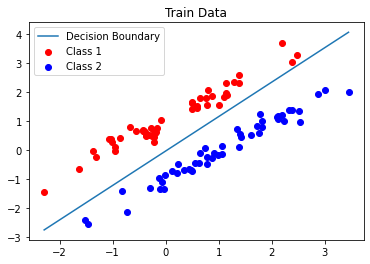

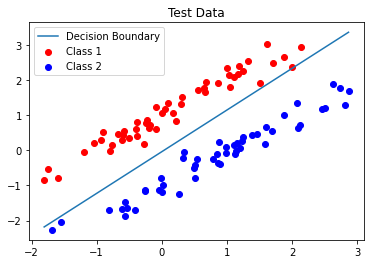

The accuracy during the training phase=  100.0 %
The accuracy during the testing phase=  100.0 %


In [36]:
print("Dataset 1")
train_accuracy, test_accuracy = training_diff('dataset1_train.csv', 'dataset1_test.csv', 0)
print("The accuracy during the training phase= ", train_accuracy, "%")
print("The accuracy during the testing phase= ", test_accuracy, "%")

Dataset 2


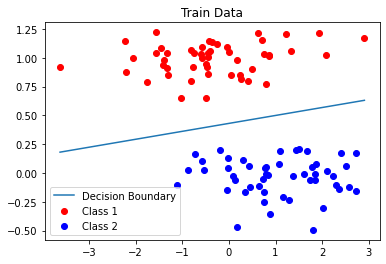

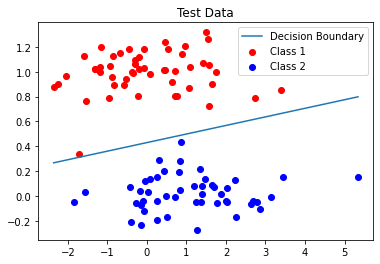

The accuracy during the training phase=  100.0 %
The accuracy during the testing phase=  99.0 %


In [37]:
print("Dataset 2")
train_accuracy, test_accuracy = training_diff('dataset2_train.csv', 'dataset2_test.csv', 0)
print("The accuracy during the training phase= ", train_accuracy, "%")
print("The accuracy during the testing phase= ", test_accuracy, "%")

Dataset 3


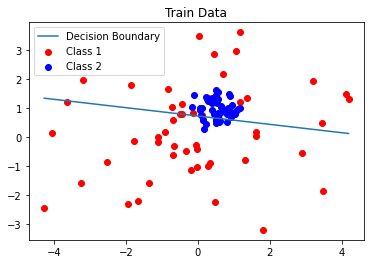

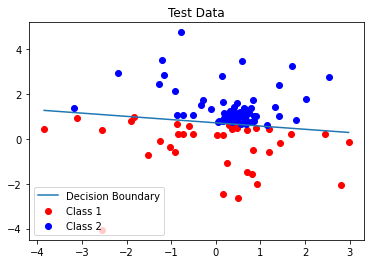

The accuracy during the training phase=  68.0 %
The accuracy during the testing phase=  75.0 %


In [41]:
print("Dataset 3")
train_accuracy, test_accuracy = training_diff('dataset3_train.csv', 'dataset3_test.csv', 0)
print("The accuracy during the training phase= ", train_accuracy, "%")
print("The accuracy during the testing phase= ", test_accuracy, "%")

**4 (b)**

In [42]:
print("Dataset 1")
train_arr = []
test_arr = []

for i in range(10):
    train_accuracy, test_accuracy = training_diff('dataset1_train.csv', 'dataset1_test.csv', 0, False)
    train_arr.append(train_accuracy)
    test_arr.append(test_accuracy)
    
print("Training accuracy mean: ", np.mean(train_arr))
print("Testing accuracy mean: ", np.mean(test_arr))
print("Training accuracy standard deviation: ", np.std(train_arr))
print("Testing accuracy standard deviation: ", np.std(test_arr))

Dataset 1
Training accuracy mean:  100.0
Testing accuracy mean:  100.0
Training accuracy standard deviation:  0.0
Testing accuracy standard deviation:  0.0


In [43]:
print("Dataset 2")
train_arr = []
test_arr = []

for i in range(10):
    train_accuracy, test_accuracy = training_diff('dataset2_train.csv', 'dataset2_test.csv', 0, False)
    train_arr.append(train_accuracy)
    test_arr.append(test_accuracy)
    
print("Training accuracy mean: ", np.mean(train_arr))
print("Testing accuracy mean: ", np.mean(test_arr))
print("Training accuracy standard deviation: ", np.std(train_arr))
print("Testing accuracy standard deviation: ", np.std(test_arr))

Dataset 2
Training accuracy mean:  100.0
Testing accuracy mean:  98.9
Training accuracy standard deviation:  0.0
Testing accuracy standard deviation:  0.9433981132056604


In [44]:
print("Dataset 3")
train_arr = []
test_arr = []

for i in range(10):
    train_accuracy, test_accuracy = training_diff('dataset3_train.csv', 'dataset3_test.csv', 0, False)
    train_arr.append(train_accuracy)
    test_arr.append(test_accuracy)
    
print("Training accuracy mean: ", np.mean(train_arr))
print("Testing accuracy mean: ", np.mean(test_arr))
print("Training accuracy standard deviation: ", np.std(train_arr))
print("Testing accuracy standard deviation: ", np.std(test_arr))

Dataset 3
Training accuracy mean:  58.2
Testing accuracy mean:  59.3
Training accuracy standard deviation:  13.325164164091937
Testing accuracy standard deviation:  12.017071190602142


**4 (c)**

Dataset 1


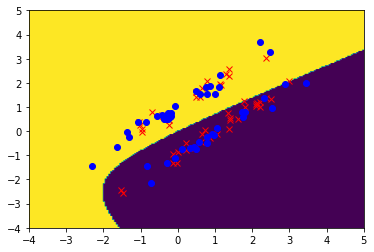

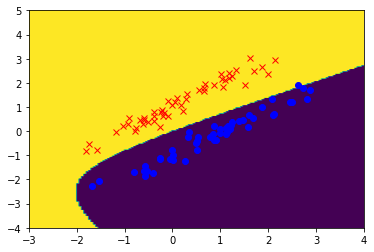

The accuracy for the train data is 100.0 %
The accuracy for the test data is 100.0 %


In [45]:
print("Dataset 1")
train_accuracy, test_accuracy = training_diff('dataset1_train.csv', 'dataset1_test.csv', 2, False)
print("The accuracy for the train data is", train_accuracy, "%")
print("The accuracy for the test data is", test_accuracy, "%")

Dataset 2


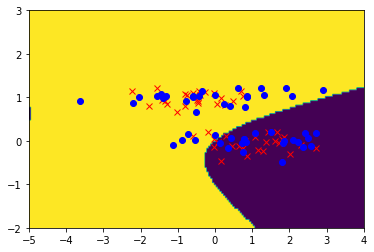

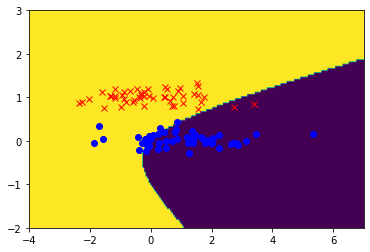

The accuracy for the train data is 100.0 %
The accuracy for the test data is 94.0 %


In [46]:
print("Dataset 2")
train_accuracy, test_accuracy = training_diff('dataset2_train.csv', 'dataset2_test.csv', 2, False)
print("The accuracy for the train data is", train_accuracy, "%")
print("The accuracy for the test data is", test_accuracy, "%")

Dataset 3


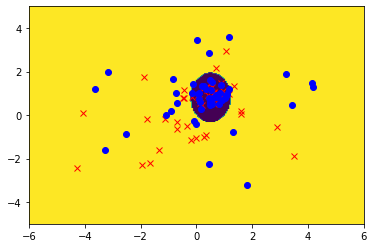

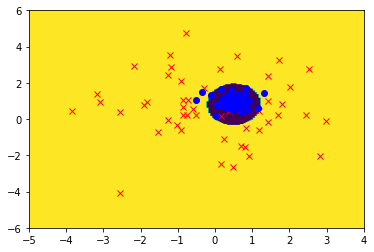

The accuracy for the train data is 95.0 %
The accuracy for the test data is 93.0 %


In [47]:
print("Dataset 3")
train_accuracy, test_accuracy = training_diff('dataset3_train.csv', 'dataset3_test.csv', 2, False)
print("The accuracy for the train data is", train_accuracy, "%")
print("The accuracy for the test data is", test_accuracy, "%")

**4 (d)**

Dataset 1


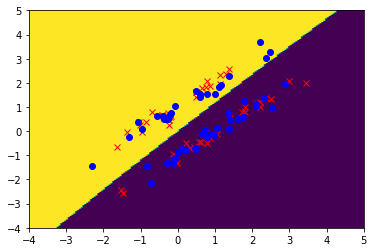

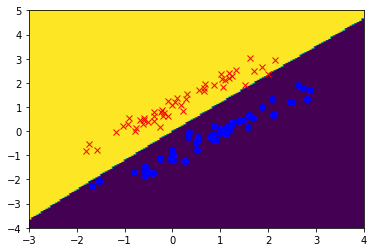

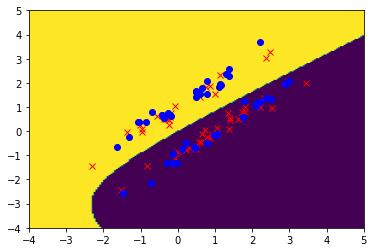

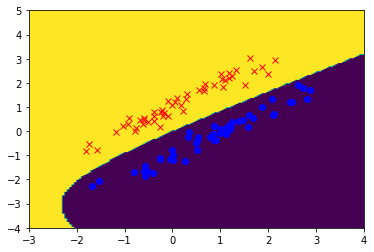

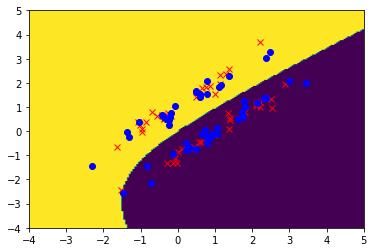

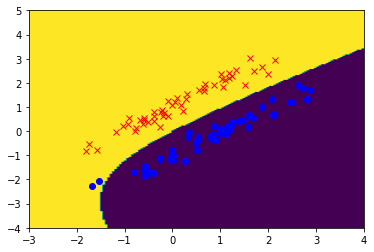

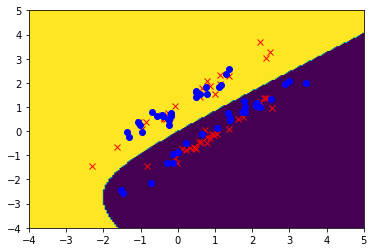

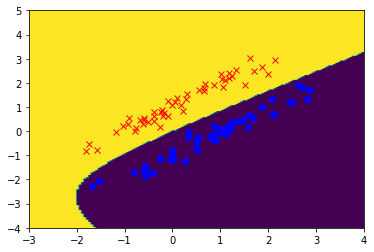

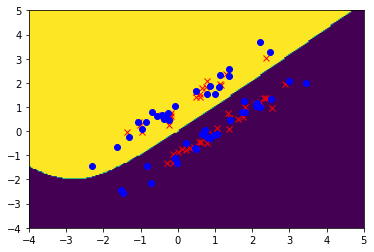

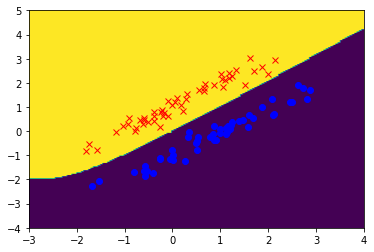

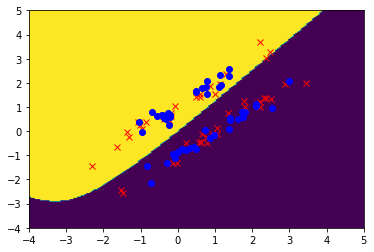

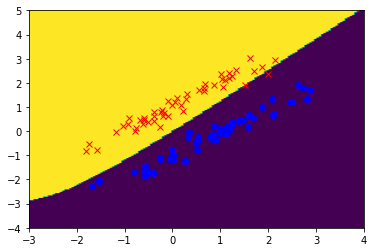

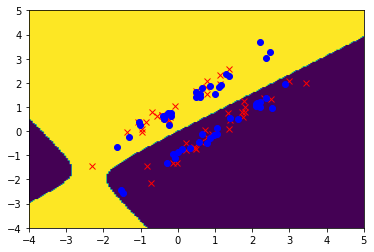

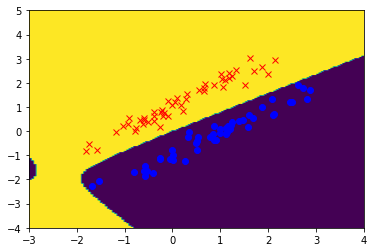

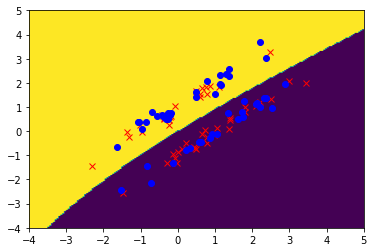

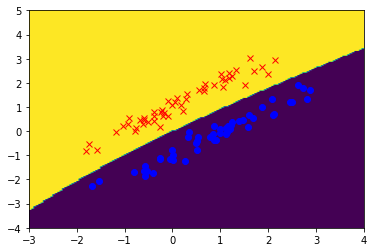

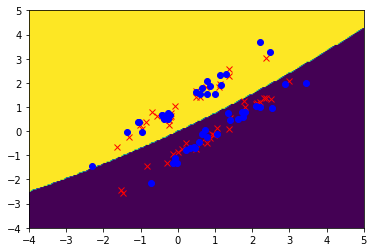

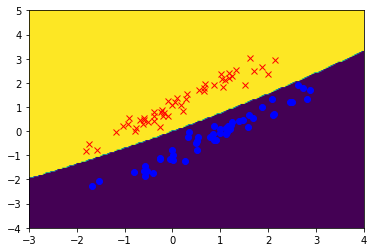

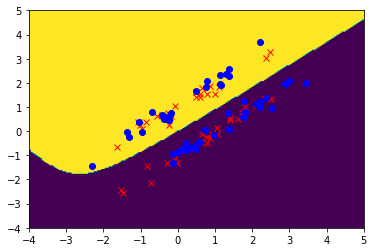

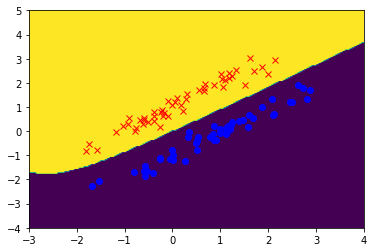

Training accuracy mean:  100.0
Testing accuracy mean:  99.6
Training accuracy standard deviation:  0.0
Testing accuracy standard deviation:  0.66332495807108


In [48]:
print("Dataset 1")
train_arr = []
test_arr = []

for i in range(10):
    train_accuracy, test_accuracy = training_diff('dataset1_train.csv', 'dataset1_test.csv', 2, False)
    train_arr.append(train_accuracy)
    test_arr.append(test_accuracy)
    
print("Training accuracy mean: ", np.mean(train_arr))
print("Testing accuracy mean: ", np.mean(test_arr))
print("Training accuracy standard deviation: ", np.std(train_arr))
print("Testing accuracy standard deviation: ", np.std(test_arr))

Dataset 2


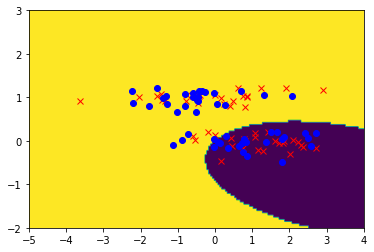

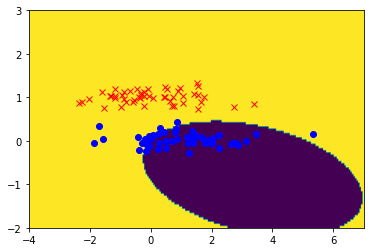

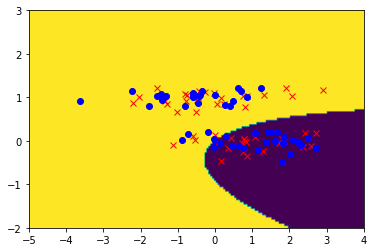

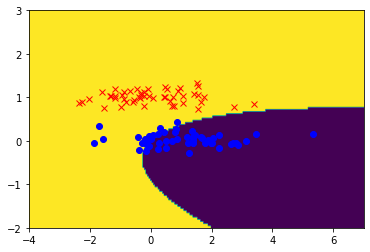

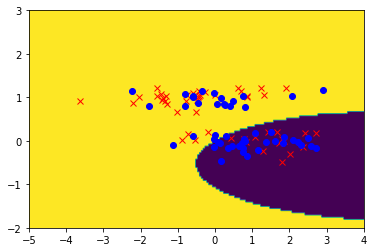

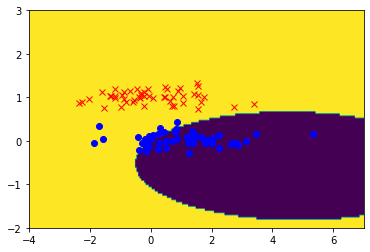

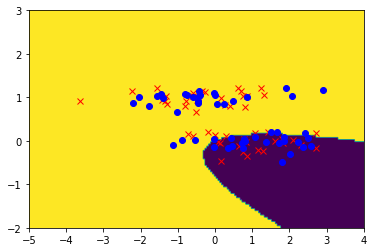

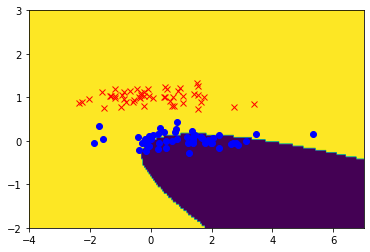

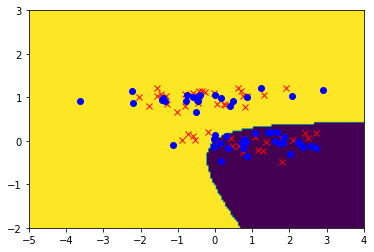

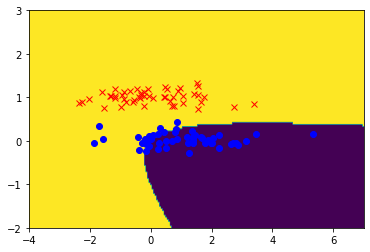

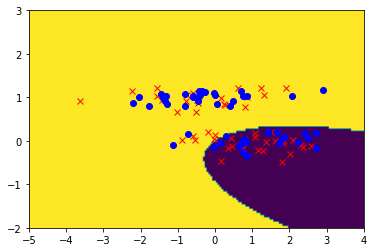

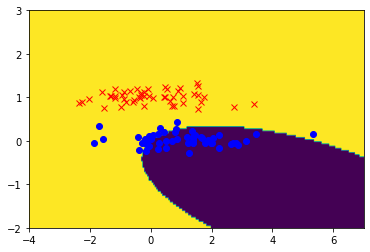

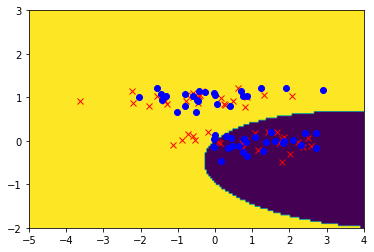

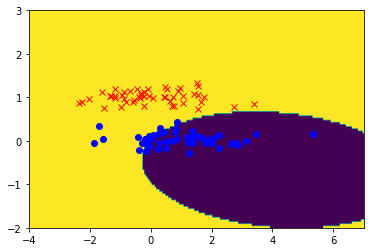

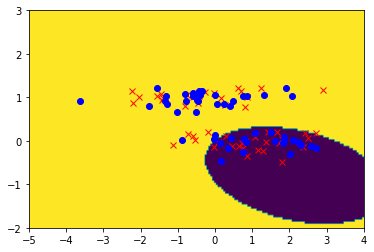

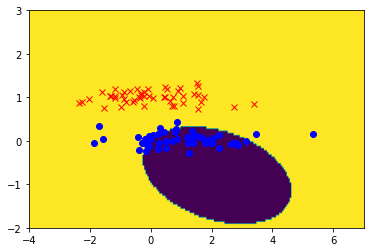

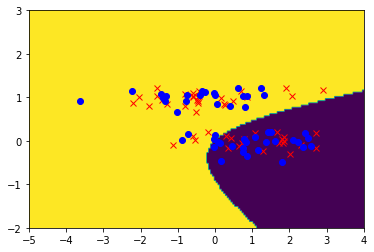

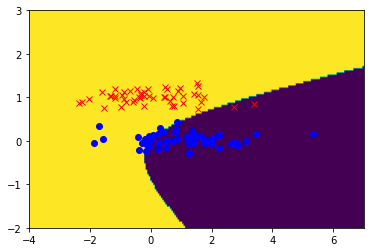

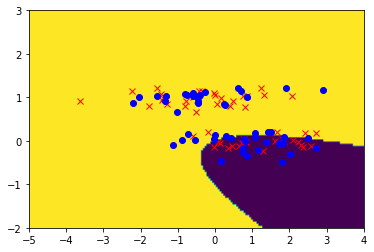

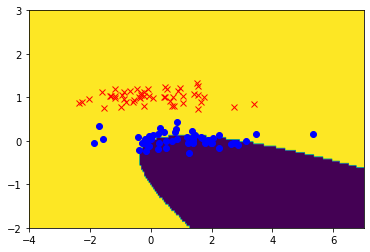

Training accuracy mean:  100.0
Testing accuracy mean:  95.1
Training accuracy standard deviation:  0.0
Testing accuracy standard deviation:  1.2206555615733703


In [49]:
print("Dataset 2")
train_arr = []
test_arr = []

for i in range(10):
    train_accuracy, test_accuracy = training_diff('dataset2_train.csv', 'dataset2_test.csv', 2, False)
    train_arr.append(train_accuracy)
    test_arr.append(test_accuracy)
    
print("Training accuracy mean: ", np.mean(train_arr))
print("Testing accuracy mean: ", np.mean(test_arr))
print("Training accuracy standard deviation: ", np.std(train_arr))
print("Testing accuracy standard deviation: ", np.std(test_arr))

Dataset 3


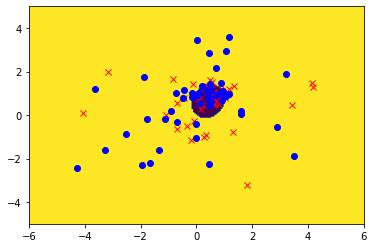

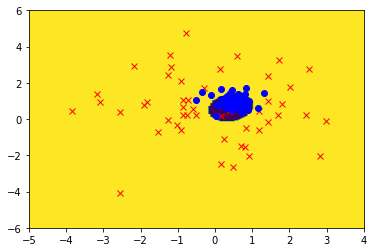

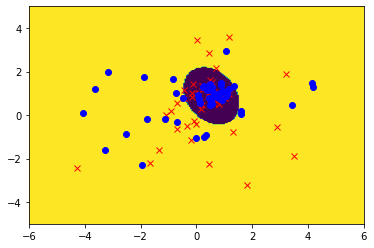

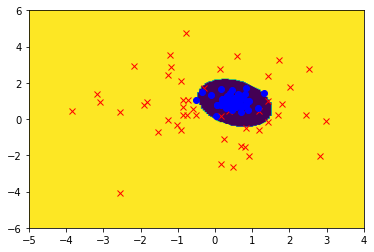

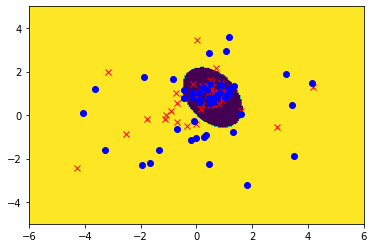

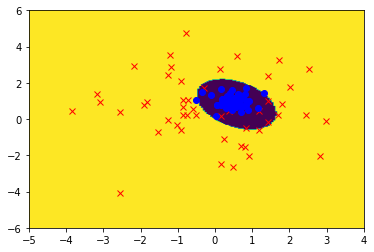

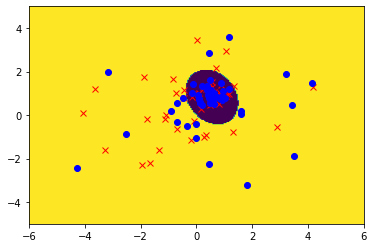

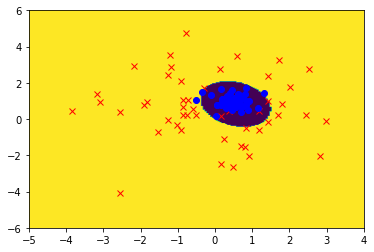

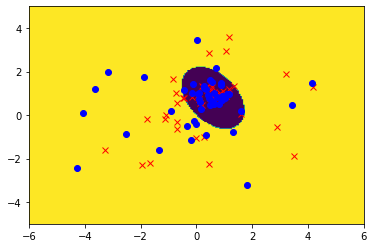

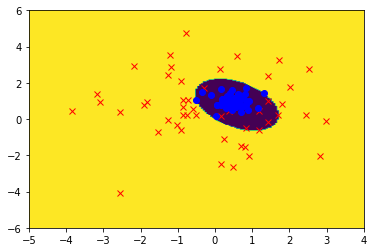

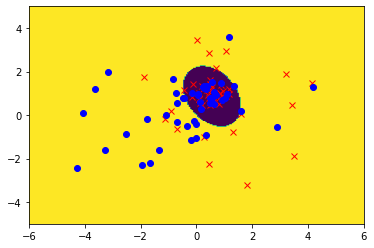

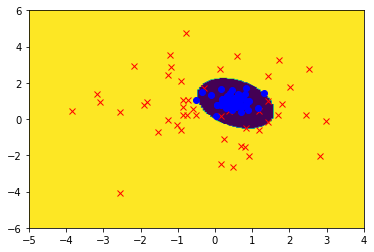

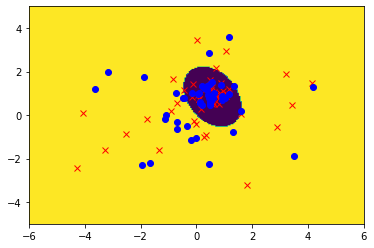

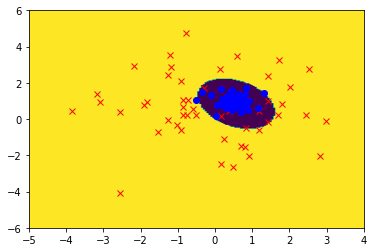

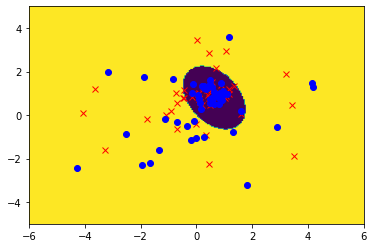

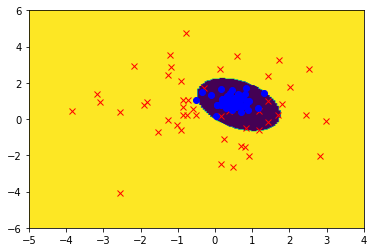

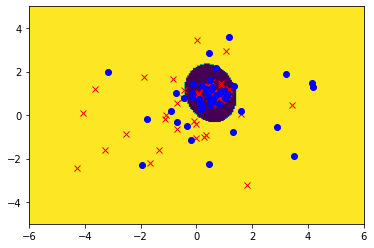

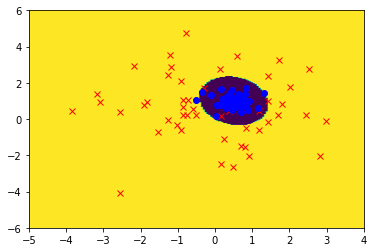

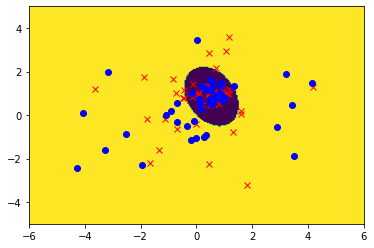

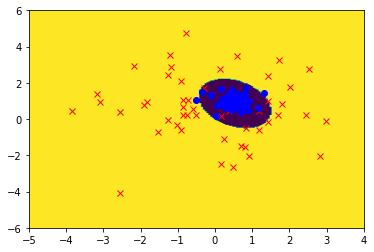

Training accuracy mean:  96.0
Testing accuracy mean:  91.9
Training accuracy standard deviation:  1.0954451150103321
Testing accuracy standard deviation:  0.9433981132056604


In [50]:
print("Dataset 3")
train_arr = []
test_arr = []

for i in range(10):
    train_accuracy, test_accuracy = training_diff('dataset3_train.csv', 'dataset3_test.csv', 2, False)
    train_arr.append(train_accuracy)
    test_arr.append(test_accuracy)
    
print("Training accuracy mean: ", np.mean(train_arr))
print("Testing accuracy mean: ", np.mean(test_arr))
print("Training accuracy standard deviation: ", np.std(train_arr))
print("Testing accuracy standard deviation: ", np.std(test_arr))

**4 (e)**

Dataset 1


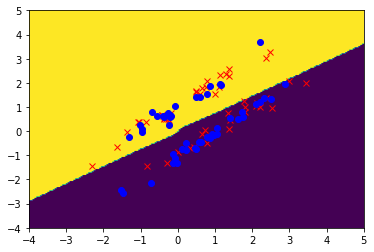

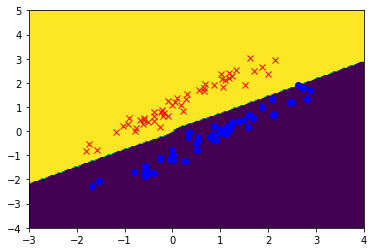

The accuracy for the train data is 100.0 %
The accuracy for the test data is 99.0 %


In [51]:
print("Dataset 1")
train_accuracy, test_accuracy = training_diff('dataset1_train.csv', 'dataset1_test.csv', 3, False)
print("The accuracy for the train data is", train_accuracy, "%")
print("The accuracy for the test data is", test_accuracy, "%")

Dataset 2


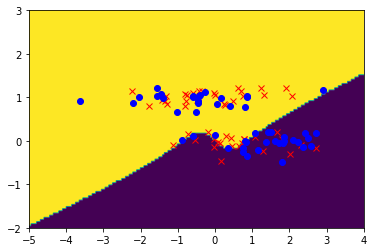

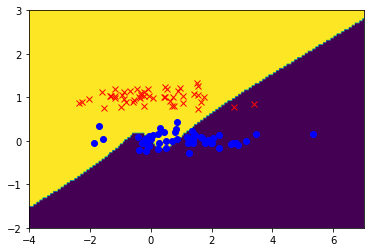

The accuracy for the train data is 100.0 %
The accuracy for the test data is 90.0 %


In [52]:
print("Dataset 2")
train_accuracy, test_accuracy = training_diff('dataset2_train.csv', 'dataset2_test.csv', 3, False)
print("The accuracy for the train data is", train_accuracy, "%")
print("The accuracy for the test data is", test_accuracy, "%")

Dataset 3


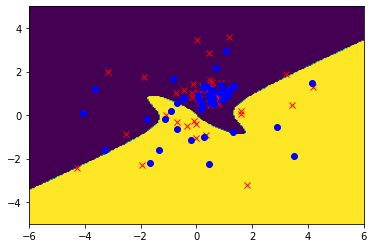

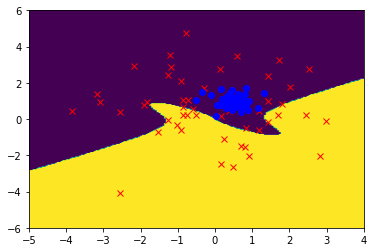

The accuracy for the train data is 74.0 %
The accuracy for the test data is 75.0 %


In [53]:
print("Dataset 3")
train_accuracy, test_accuracy = training_diff('dataset3_train.csv', 'dataset3_test.csv', 3, False)
print("The accuracy for the train data is", train_accuracy, "%")
print("The accuracy for the test data is", test_accuracy, "%")

**4 (f)**

Dataset 1


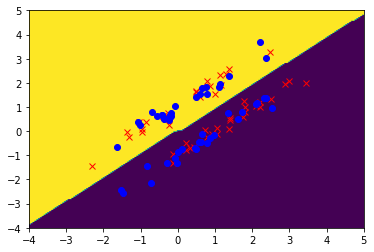

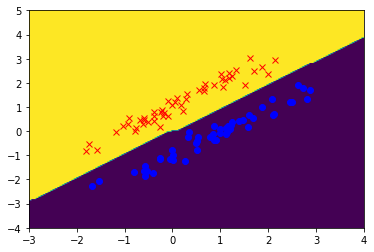

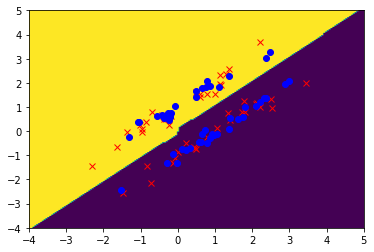

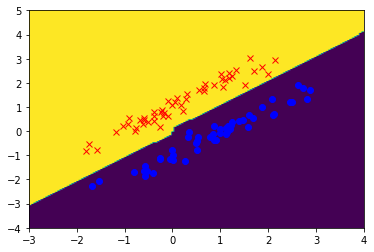

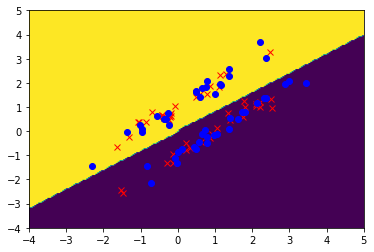

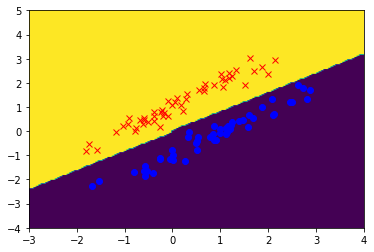

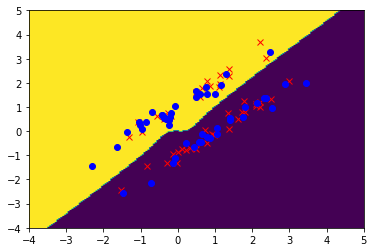

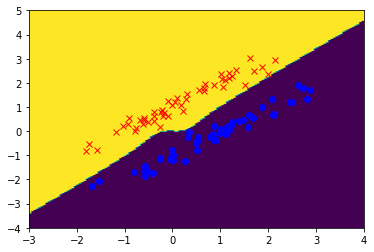

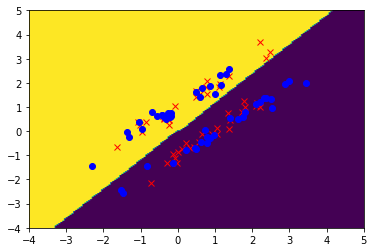

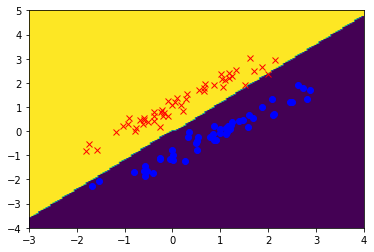

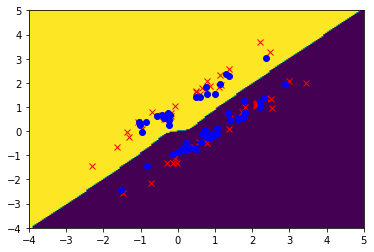

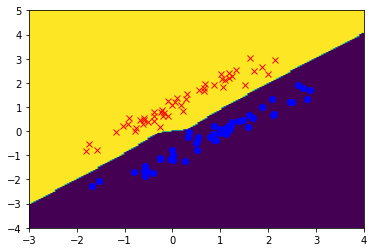

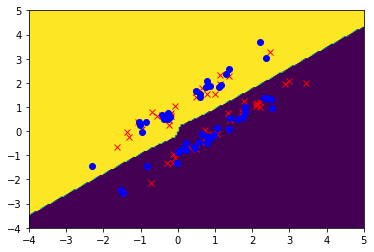

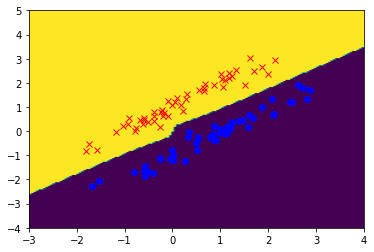

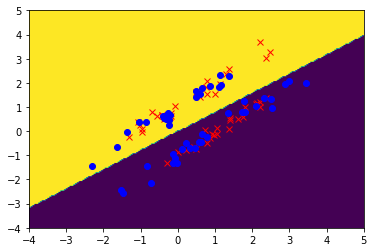

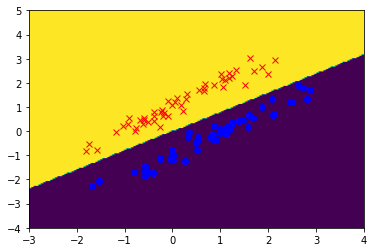

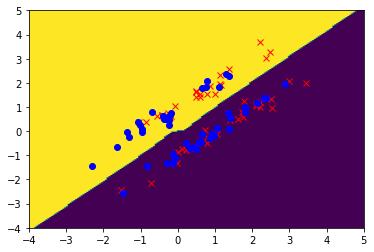

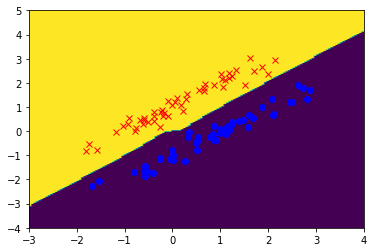

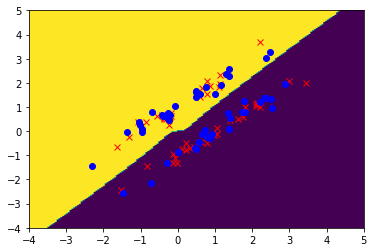

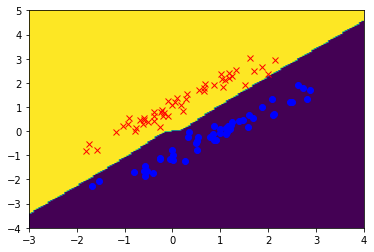

Training accuracy mean:  100.0
Testing accuracy mean:  99.3
Training accuracy standard deviation:  0.0
Testing accuracy standard deviation:  0.9


In [54]:
print("Dataset 1")
train_arr = []
test_arr = []

for i in range(10):
    train_accuracy, test_accuracy = training_diff('dataset1_train.csv', 'dataset1_test.csv', 3, False)
    train_arr.append(train_accuracy)
    test_arr.append(test_accuracy)
    
print("Training accuracy mean: ", np.mean(train_arr))
print("Testing accuracy mean: ", np.mean(test_arr))
print("Training accuracy standard deviation: ", np.std(train_arr))
print("Testing accuracy standard deviation: ", np.std(test_arr))

Dataset 2


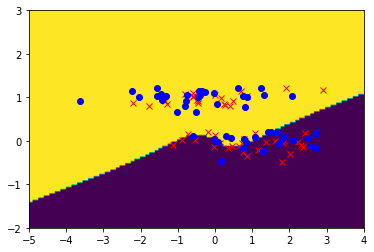

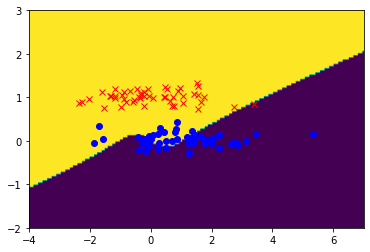

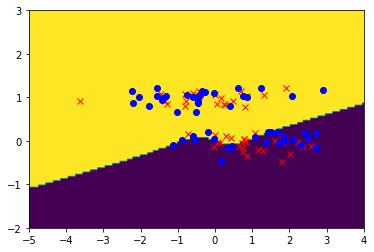

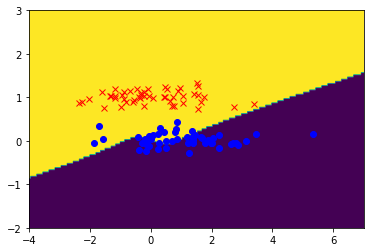

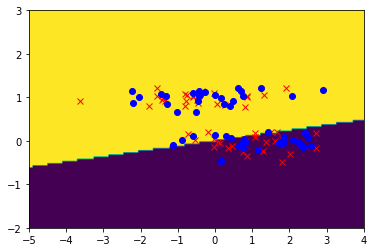

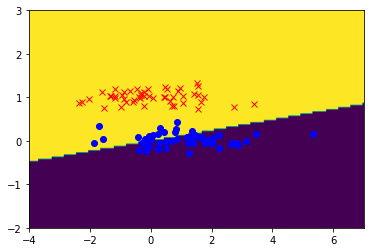

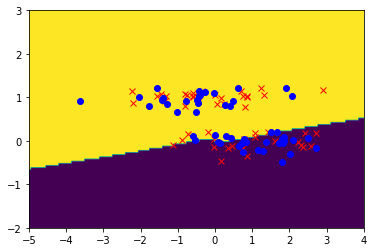

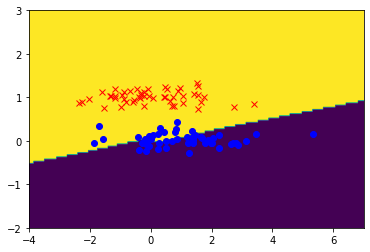

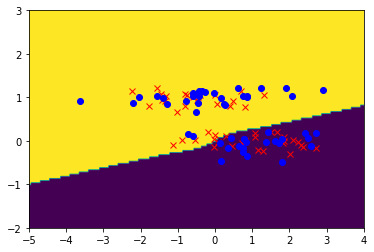

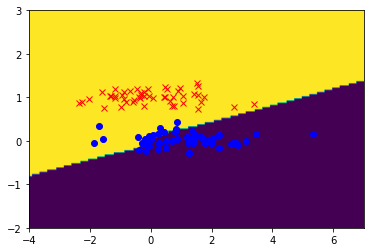

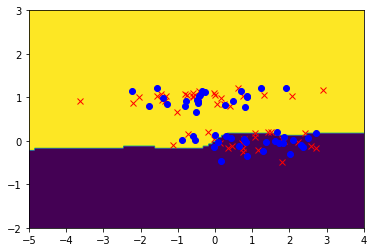

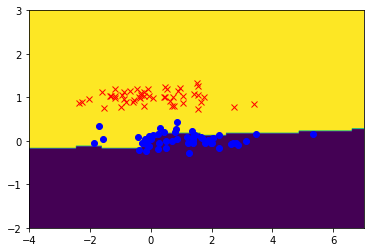

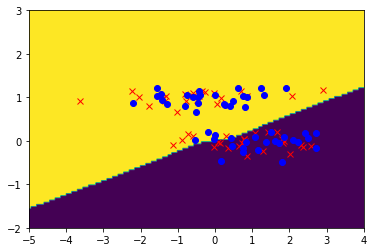

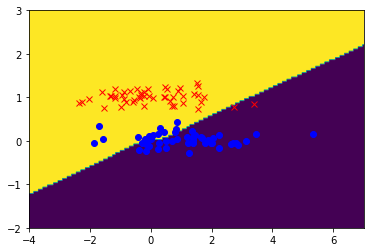

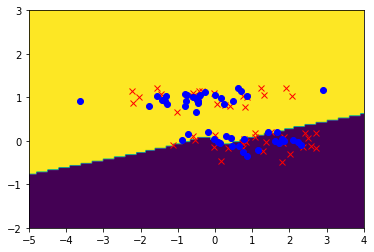

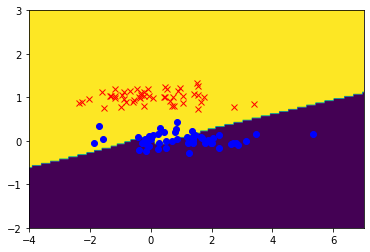

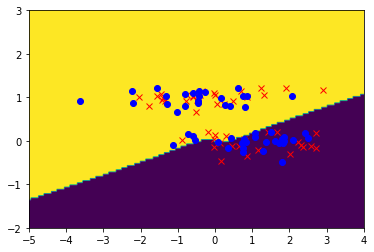

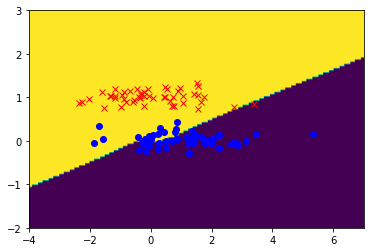

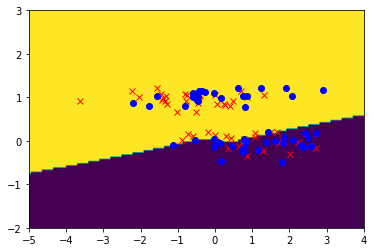

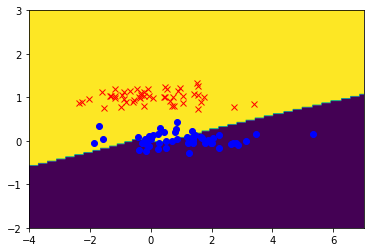

Training accuracy mean:  100.0
Testing accuracy mean:  95.4
Training accuracy standard deviation:  0.0
Testing accuracy standard deviation:  0.9165151389911679


In [55]:
print("Dataset 2")
train_arr = []
test_arr = []

for i in range(10):
    train_accuracy, test_accuracy = training_diff('dataset2_train.csv', 'dataset2_test.csv', 3, False)
    train_arr.append(train_accuracy)
    test_arr.append(test_accuracy)
    
print("Training accuracy mean: ", np.mean(train_arr))
print("Testing accuracy mean: ", np.mean(test_arr))
print("Training accuracy standard deviation: ", np.std(train_arr))
print("Testing accuracy standard deviation: ", np.std(test_arr))

Dataset 3


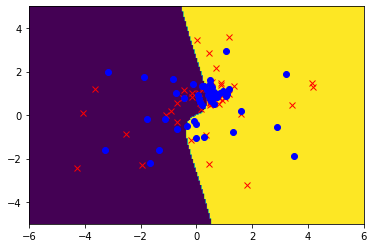

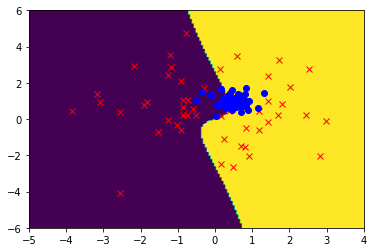

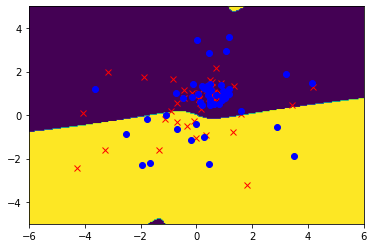

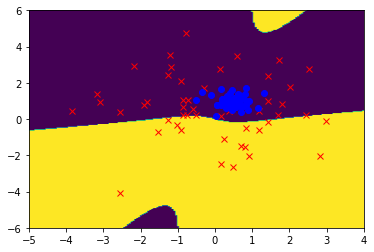

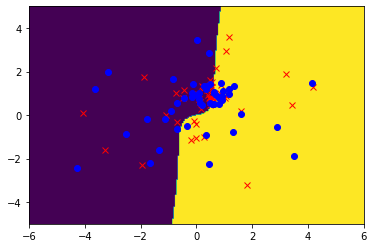

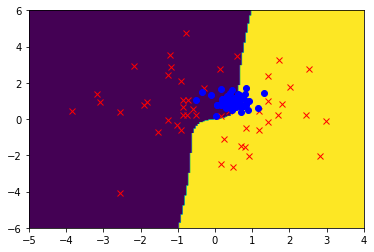

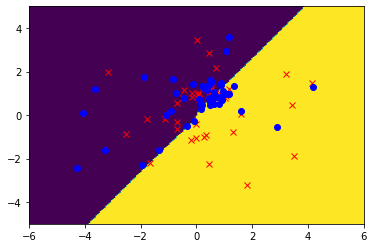

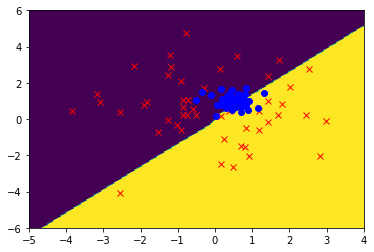

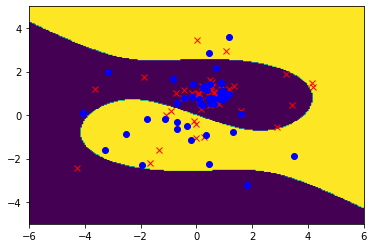

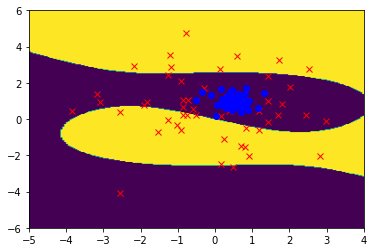

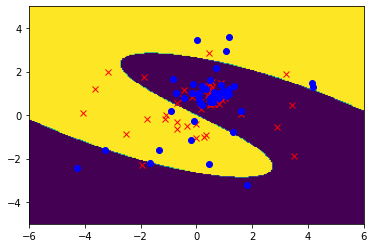

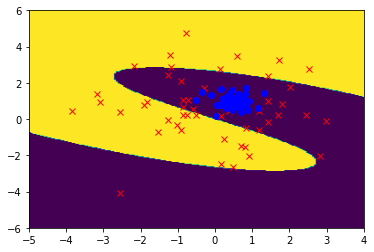

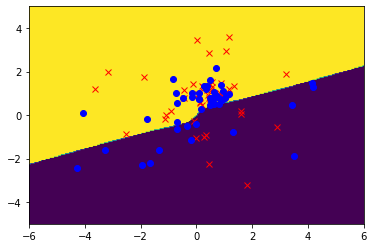

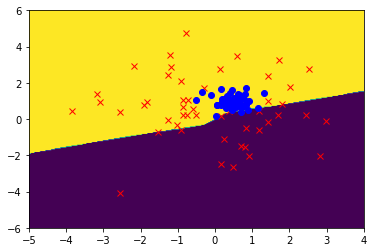

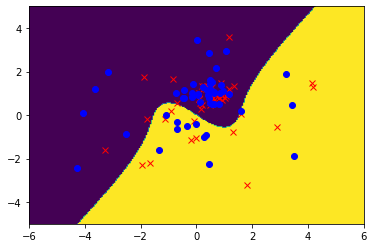

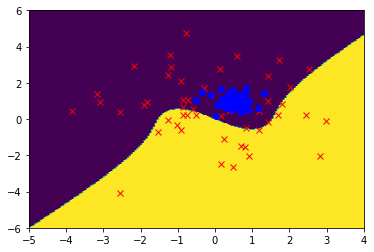

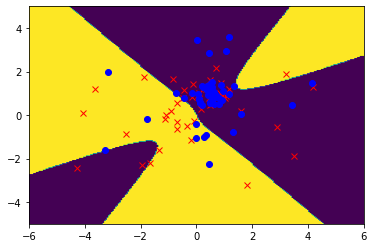

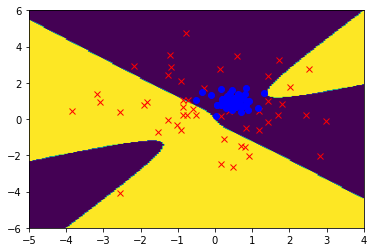

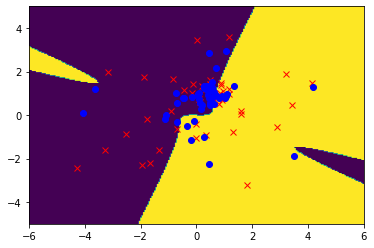

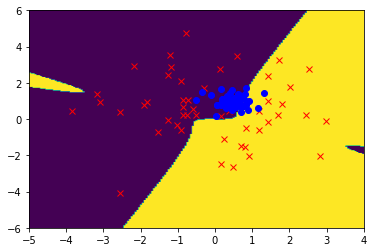

Training accuracy mean:  57.6
Testing accuracy mean:  59.9
Training accuracy standard deviation:  17.709884245810304
Testing accuracy standard deviation:  16.87275911047153


In [56]:
print("Dataset 3")
train_arr = []
test_arr = []

for i in range(10):
    train_accuracy, test_accuracy = training_diff('dataset3_train.csv', 'dataset3_test.csv', 3, False)
    train_arr.append(train_accuracy)
    test_arr.append(test_accuracy)
    
print("Training accuracy mean: ", np.mean(train_arr))
print("Testing accuracy mean: ", np.mean(test_arr))
print("Training accuracy standard deviation: ", np.std(train_arr))
print("Testing accuracy standard deviation: ", np.std(test_arr))